In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#ler os dados
Base_Dados=pd.read_csv('/content/drive/MyDrive/Startups+in+2021+end (2).csv')

In [ ]:
#verificar dimensão
Base_Dados.shape

(936, 8)

In [ ]:
#primeiros registros
Base_Dados.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [ ]:
#columnas
Base_Dados.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [ ]:
# Renomear
Base_Dados.rename( columns={
    'Unnamed: 0' : 'Id',
    'Company' : 'Empresa',
    'Valuation ($B)' : 'Valor ($)',
    'Date Joined' : 'Data de Adesão',
    'Country' : 'Pais',
    'City' : 'Cidade',
    'Industry': 'Setor',
    'Select Investors': 'Investidores',
}, inplace=True )







In [ ]:
#verificar tipo de informação
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              936 non-null    int64 
 1   Empresa         936 non-null    object
 2   Valor ($)       936 non-null    object
 3   Data de Adesão  936 non-null    object
 4   Pais            936 non-null    object
 5   Cidade          921 non-null    object
 6   Setor           936 non-null    object
 7   Investidores    935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [ ]:
Base_Dados.isnull().sum()

Id                 0
Empresa            0
Valor ($)          0
Data de Adesão     0
Pais               0
Cidade            15
Setor              0
Investidores       1
dtype: int64

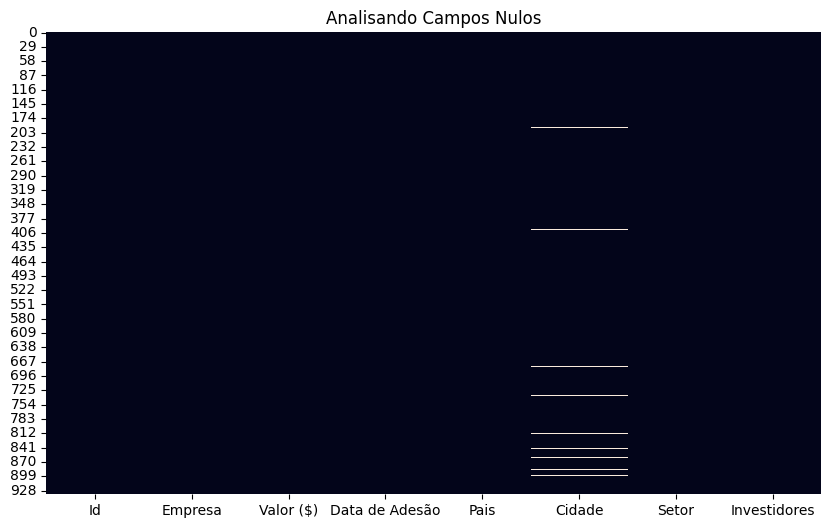

In [ ]:
# Grafica
plt.figure( figsize=(10,6) )
plt.title('Analisando Campos Nulos')
sns.heatmap( Base_Dados.isnull(), cbar=False );


In [ ]:
#campos unicos
Base_Dados.nunique()

Id                936
Empresa           935
Valor ($)         192
Data de Adesão    589
Pais               47
Cidade            239
Setor              17
Investidores      920
dtype: int64

In [ ]:
#valores
Base_Dados['Setor'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [ ]:
# Valores Unicos - Rank
Base_Dados['Setor'].value_counts()

Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: Setor, dtype: int64

In [ ]:
#valores unicos- Ranl
Base_Dados['Setor'].value_counts()

Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: Setor, dtype: int64

In [ ]:
#valores Unicos Rank
Base_Dados['Setor'].value_counts(normalize=True)

Fintech                                0.202991
Internet software & services           0.178419
E-commerce & direct-to-consumer        0.108974
Artificial intelligence                0.073718
Health                                 0.067308
Supply chain, logistics, & delivery    0.054487
Other                                  0.054487
Cybersecurity                          0.043803
Mobile & telecommunications            0.039530
Data management & analytics            0.038462
Hardware                               0.034188
Auto & transportation                  0.030983
Edtech                                 0.028846
Consumer & retail                      0.024573
Travel                                 0.013889
Artificial Intelligence                0.004274
Finttech                               0.001068
Name: Setor, dtype: float64

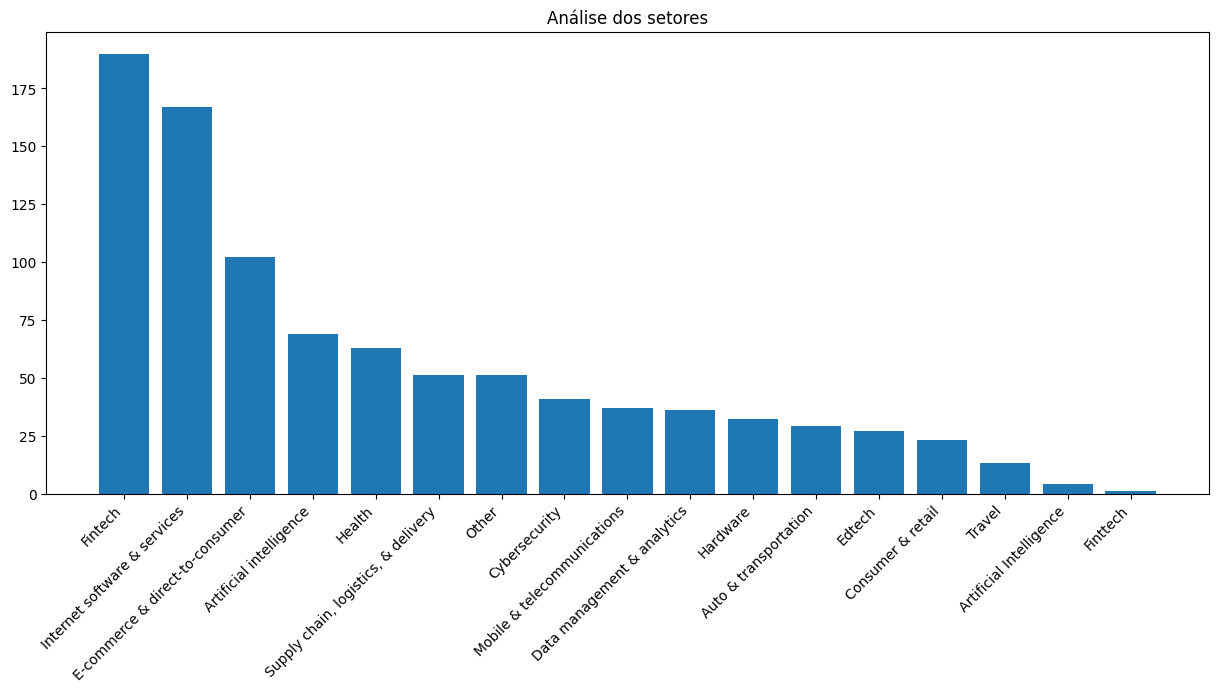

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Análise dos setores')

plt.bar( Base_Dados['Setor'].value_counts().index, Base_Dados['Setor'].value_counts()  )
plt.xticks(rotation=45,ha='right');

In [ ]:
Analise=round(Base_Dados['Pais'].value_counts(normalize=True)*100,1)

([<matplotlib.patches.Wedge at 0x79bfdbd7c490>,
 [Text(-1.0991433885816444, -0.043402895493968086, ''),
  Text(0.6660732924303907, -0.8754121138703413, ''),
  Text(1.0825434309975575, -0.1951914957267261, ''),
  Text(1.0922985061465322, 0.1299383448796171, ''),
  Text(1.0428953507189969, 0.34981321794452047, ''),
  Text(0.9797124202078213, 0.500163546942931, ''),
  Text(0.9049782800978222, 0.6253113724786938, ''),
  Text(0.8282149760002079, 0.7239198529733628, ''),
  Text(0.7509735353342952, 0.8037653570710237, ''),
  Text(0.6770750743715555, 0.8669309912932822, ''),
  Text(0.609501382331964, 0.9157008599621522, ''),
  Text(0.55350481524947, 0.9505958234158459, ''),
  Text(0.5140314746366867, 0.9725079141492029, ''),
  Text(0.47682445237587184, 0.9912812121776797, ''),
  Text(0.44211545123656837, 1.0072407496611153, ''),
  Text(0.4100979637161354, 1.0206956746042766, ''),
  Text(0.380931787068006, 1.0319355472127003, ''),
  Text(0.35474734400604274, 1.0412273152009885, ''),
  Text(0.32

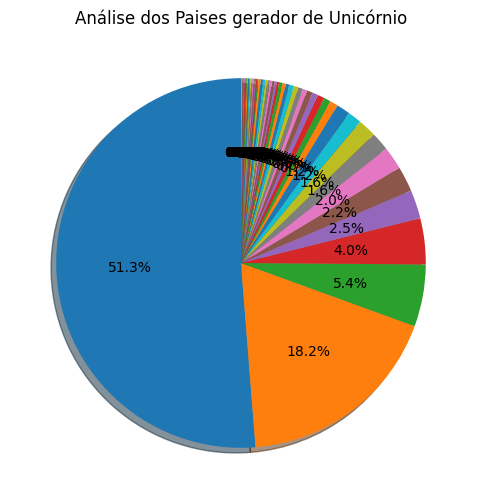

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Análise dos Paises gerador de Unicórnio')

plt.pie(



    Analise,
    shadow=True,
    startangle=90,
    autopct='%1.1f%%',

)

([<matplotlib.patches.Wedge at 0x79bfdb49bb80>,
 [Text(-1.0741107627903081, -0.23724685299919726, 'United States'),
  Text(0.9646056015522145, -0.5287116732720119, 'China'),
  Text(1.0432646673003358, 0.3487102435586306, 'India'),
  Text(0.8742513955029906, 0.6675960586021114, 'United Kingdom'),
  Text(0.7008094999551656, 0.8478596846015211, 'Germany'),
  Text(0.5522250138684521, 0.9513398625401902, 'Israel'),
  Text(0.40665745655400115, 1.0220712856885428, 'France'),
  Text(0.27475384194568403, 1.065133947602876, 'Canada'),
  Text(0.1537690775701822, 1.0891992796468493, 'Brazil'),
  Text(0.046268432361172895, 1.099026492932195, 'South Korea')],
 [Text(-0.5858785978856226, -0.1294073743631985, '56.9%'),
  Text(0.5261485099375715, -0.28838818542109734, '20.2%'),
  Text(0.5690534548910923, 0.1902055873956167, '6.0%'),
  Text(0.4768643975470857, 0.36414330469206074, '4.5%'),
  Text(0.3822597272482721, 0.4624689188735569, '2.8%'),
  Text(0.3012136439282466, 0.5189126522946491, '2.5%'),
  T

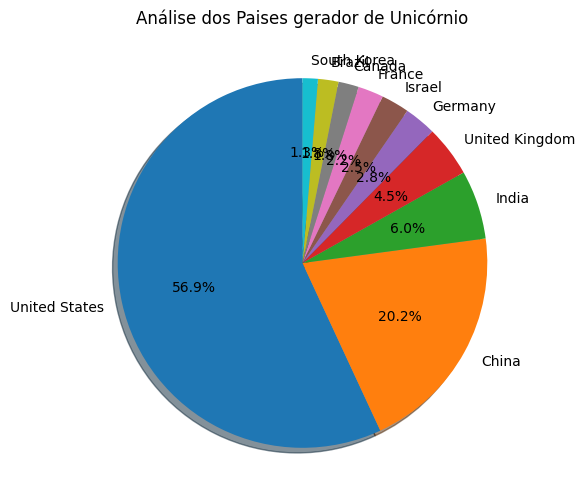

In [ ]:
#PLOT GERAL DOS PAISES
plt.figure(figsize=(15,6))
plt.title('Análise dos Paises gerador de Unicórnio')

plt.pie(



    Analise.head(10),
    labels=Analise.index[0:10],
    shadow=True,
    startangle=90,
    autopct='%1.1f%%',

)

In [ ]:
#CONVERSÃO DATA
Base_Dados['Data de Adesão']=pd.to_datetime(Base_Dados['Data de Adesão'])
Base_Dados['Data de Adesão'].head()

0   2017-04-07
1   2012-12-01
2   2014-01-23
3   2011-12-12
4   2018-01-08
Name: Data de Adesão, dtype: datetime64[ns]

In [ ]:
#extrair ano e mês
Base_Dados['Mes'] = pd.DatetimeIndex( Base_Dados['Data de Adesão'] ).month
Base_Dados['Ano'] = pd.DatetimeIndex( Base_Dados['Data de Adesão'] ).year

Base_Dados.head()

,Id,Empresa,Valor ($),Data de Adesão,Pais,Cidade,Setor,Investidores,Mes,Ano
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


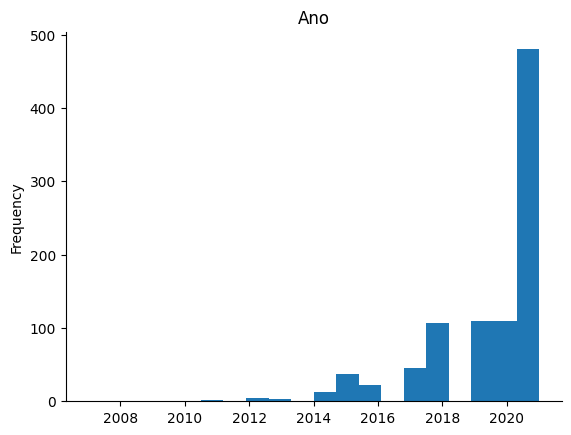

In [ ]:
# @title Ano

from matplotlib import pyplot as plt
Base_Dados['Ano'].plot(kind='hist', bins=20, title='Ano')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
Analise_Agrupada=Base_Dados.groupby(by=['Pais','Ano','Mes']).count()['Id'].reset_index()
Analise_Agrupada

,Pais,Ano,Mes,Id
0,Argentina,2021,8,1
1,Australia,2018,1,1
2,Australia,2019,3,1
3,Australia,2021,5,1
4,Australia,2021,7,2
...,...,...,...,...
373,United States,2021,10,26
374,United States,2021,11,30
375,United States,2021,12,8
376,"United States,",2021,9,1


# Nova seção

In [ ]:
Analise_Agrupada.loc[
  Analise_Agrupada['Pais']=='Brazil'

]

,Pais,Ano,Mes,Id
11,Brazil,2018,3,1
12,Brazil,2018,7,1
13,Brazil,2018,11,1
14,Brazil,2019,6,1
15,Brazil,2019,9,1
16,Brazil,2019,10,1
17,Brazil,2019,12,1
18,Brazil,2020,1,1
19,Brazil,2020,12,2
20,Brazil,2021,1,1


In [ ]:
Base_Dados['Valor ($)'] = pd.to_numeric( Base_Dados['Valor ($)'].apply( lambda Linha: Linha.replace('$', '') ) )

Base_Dados.head()

,Id,Empresa,Valor ($),Data de Adesão,Pais,Cidade,Setor,Investidores,Mes,Ano
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [ ]:
# Tabela Analitica
Analise_Pais = Base_Dados.groupby( by=['Pais'] ).sum()['Valor ($)'].reset_index()

Analise_Pais.head()


,Pais,Valor ($)
0,Argentina,2.45
1,Australia,50.60
2,Austria,5.81
3,Belgium,7.55
4,Bermuda,1.60
